In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import six

import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#loading dataset

data = pd.read_csv('Dataset_02_standarized_.csv');

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
#data.info()
#data.head(3)


 	 The data frame has 923 rows and 40 columns. 



In [3]:
#Counting the number of records according to classes
status_all = list(data.shape)[0]
status_categories = list(data['is_acquired'].value_counts())

print("\n \t The data has {} status(Classes) which include {} aquiured and {} close.".format(status_all, 
                                                                                 status_categories[0], 
                                                                                status_categories[1]))


 	 The data has 923 status(Classes) which include 597 aquiured and 326 close.


In [4]:
features_mean= list(data.columns[0:36])

X = data.loc[:,features_mean]
y = data.loc[:, 'is_acquired']
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)


In [5]:
# features_mean


In [6]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# X_sm = ss.fit_transform(X_sm)


In [23]:
# Making division of dataset for testing and training
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix
import time


X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

SGD Classifier Accuracy: 54.81%
Cross validation score: 64.68% (+/- 0.39%)
Execution time: 0.049867 seconds 

[[  0 108]
 [  0 131]]


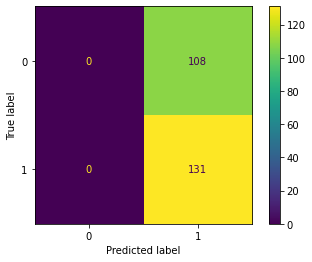

In [25]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))



print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

cm = confusion_matrix(y_test, prediction)
print(cm)

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

SVC Accuracy: 53.97%
Cross validation score: 64.68% (+/- 0.39%)
Execution time: 0.23437 seconds 

[[93 15]
 [95 36]]


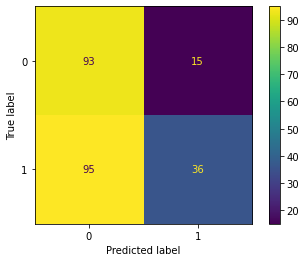

NuSVC Accuracy: 53.97%
Cross validation score: 54.82% (+/- 13.76%)
Execution time: 0.16559 seconds 

[[93 15]
 [95 36]]


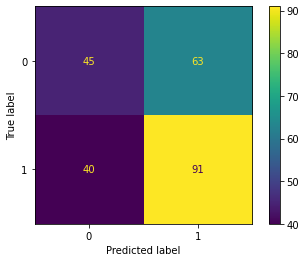

LinearSVC Accuracy: 57.74%
Cross validation score: 53.19% (+/- 30.33%)
Execution time: 0.32528 seconds 

[[77 31]
 [70 61]]


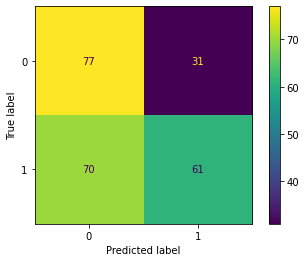

In [26]:
#NOW APPLY THE CLASSIFIERS
from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

cm = confusion_matrix(y_test, prediction)
print(cm)

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

start = time.time()

clf = NuSVC()
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


cm = confusion_matrix(y_test, prediction)
print(cm)

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


cm = confusion_matrix(y_test, prediction)
print(cm)

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

Accuracy: 66.53%
Cross validation score: 63.06% (+/- 5.59%)
Execution time: 0.10372 seconds 

[[73 35]
 [45 86]]


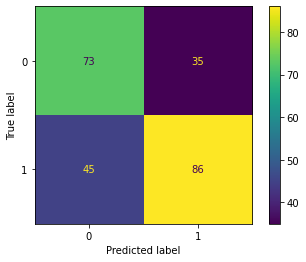

In [27]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


cm = confusion_matrix(y_test, prediction)
print(cm)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

Accuracy: 44.77%
Cross validation score: 42.67% (+/- 21.14%)
Execution time: 0.033941 seconds 

[[106   2]
 [130   1]]


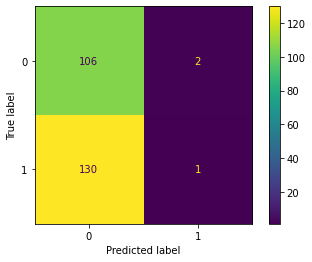

In [28]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


cm = confusion_matrix(y_test, prediction)
print(cm)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  


Random Forest Accuracy: 80.75%
Cross validation score: 80.61% (+/- 2.51%)
Execution time: 1.3467 seconds 

[[ 88  20]
 [ 26 105]]


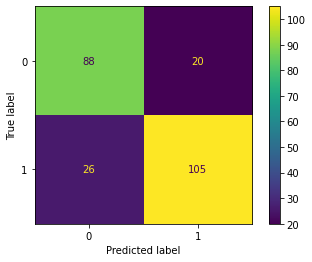

Extra Trees Accuracy: 82.43%
Cross validation score: 75.84% (+/- 3.65%)
Execution time: 0.99634 seconds 

[[ 92  16]
 [ 26 105]]


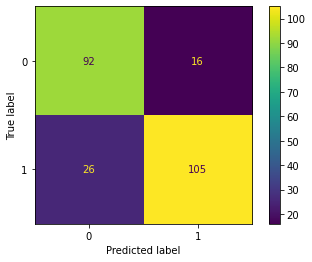

Dedicion Tree Accuracy: 76.15%
Cross validation score: 68.37% (+/- 5.44%)
Execution time: 0.082024 seconds 

[[87 21]
 [36 95]]


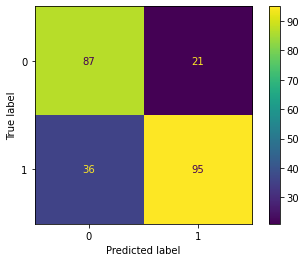

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


cm = confusion_matrix(y_test, prediction)
print(cm)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

cm = confusion_matrix(y_test, prediction)
print(cm)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

cm = confusion_matrix(y_test, prediction)
print(cm)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

In [13]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#import imputer:
from sklearn.impute import KNNImputer
#score
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier

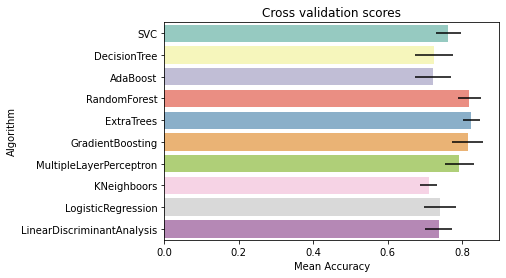

In [129]:
# All in one 
y=data["is_acquired"]
X= data.loc[:, data.columns != 'is_acquired']
X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.2, random_state=42)

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()